# Cassava Data Exploration

In this notebook I will take a look at some of the Cassava dataset images.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pathlib
import PIL
import PIL.Image
import tensorflow as tf

In [2]:
#style stuff
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['axes.grid']=False
rcParams['xtick.minor.visible']=True
rcParams['ytick.minor.visible']=True
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'

def set_plot(size):
    plt.rc('axes', titlesize=size)     # fontsize of the axes title
    plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=size*0.8)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=size*0.8)    # fontsize of the tick labels

In [3]:
print(tf.__version__)

2.0.0


In [4]:
#create data directory path and count images
data_dir = pathlib.Path('../data/external/')

print("There are", len(list(data_dir.glob('train_images/*.jpg'))), "training images and", 
      len(list(data_dir.glob('test_images/*.jpg'))), "test images.")

There are 21397 training images and 1 test images.


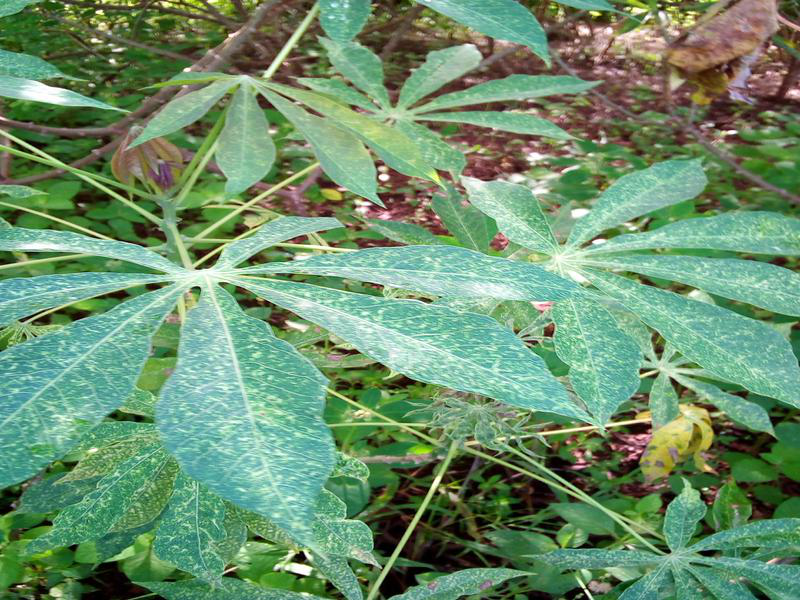

In [5]:
#Look at a few training images - load a list of image paths 
train_images = list(data_dir.glob('train_images/*.jpg'))

#display first training image
PIL.Image.open(str(train_images[0]))

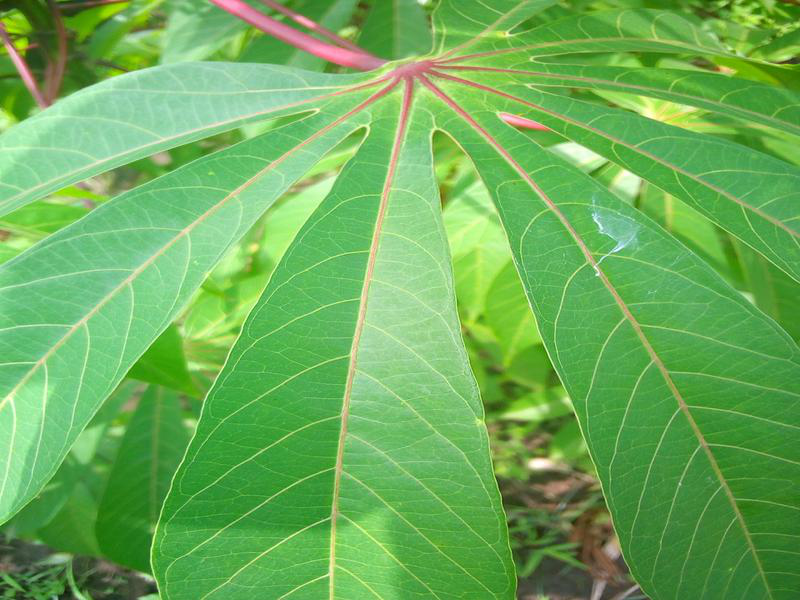

In [6]:
PIL.Image.open(str(train_images[5]))

In [7]:
#let's take a look at image sizes
sizes = []

for i in range(len(train_images)):
    size = PIL.Image.open(str(train_images[i])).size
    sizes.append(size) 
    
print("Set of possible image sizes:", set(sizes))

Set of possible image sizes: {(800, 600)}


In [8]:
#define loader parameters
batch_size = 32
img_height = 600
img_width = 800

In [9]:
train_df = pd.read_csv('../data/external/train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21397 entries, 0 to 21396
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  21397 non-null  object
 1   label     21397 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 334.5+ KB


In [10]:
label_key = pd.read_json('../data/external/label_num_to_disease_map.json', typ='series')
label_key

0         Cassava Bacterial Blight (CBB)
1    Cassava Brown Streak Disease (CBSD)
2             Cassava Green Mottle (CGM)
3           Cassava Mosaic Disease (CMD)
4                                Healthy
dtype: object

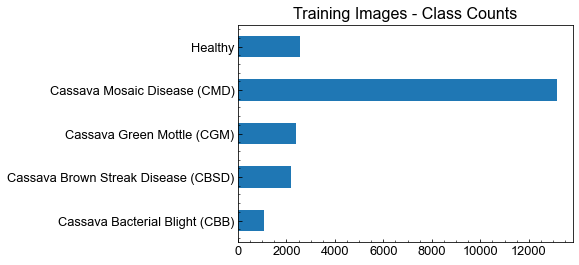

In [11]:
set_plot(16)
train_df.groupby('label').count().set_index(label_key).plot.barh(title='Training Images - Class Counts', legend=False)
plt.show()

In [34]:
def plot_image_with_label(index):
    img_id = str(train_images[index]).split('/')[-1]
    img_label = np.squeeze(train_df.loc[train_df['image_id'] == img_id, 'label'])
    label_name = label_key.loc[img_label]
    
    plt.imshow(PIL.Image.open(str(train_images[index])))
    plt.title(np.squeeze(label_name))
    plt.show()

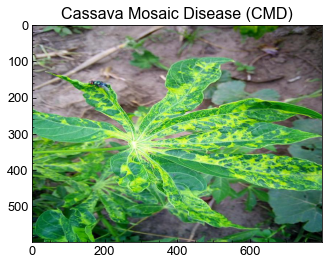

In [35]:
plot_image_with_label(10)

In [13]:
#train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir.glob('train_images'), labels=train_df.itertuples(), 
#                                                    label_mode='int', image_size=(600,800), batch_size=32, 
#                                                    validation_split=0.2, seed=123, subset='training')

## Messing around with tfrecords

I don't really know what these are at all yet, but I will figure it out!

In [14]:
train_record_files = list(data_dir.glob('train_tfrecords/*.tfrec'))

In [15]:
raw_dataset = tf.data.TFRecordDataset(str(train_record_files[0]))

In [16]:
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [17]:
for raw_record in raw_dataset.take(1):
    print(repr(raw_record))

<tf.Tensor: id=20, shape=(), dtype=string, numpy=b'\n\xd0\x95\x0b\n\x99\x95\x0b\n\x05image\x12\x8e\x95\x0b\n\x8a\x95\x0b\n\x86\x95\x0b\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x02\x00\x02\x00\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x02\x03\x00\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x07\x04\x05\x08\x00\x02\x03\x01\t\xff\xc4\x00L\x10\x00\x01\x03\x03\x04\x00\x05\x02\x04\x04\x04\x04\x04\x02\x06\x0b\x01\x02\x03\x04\x05\x06\x11\x00\x07\x12!\x08\x13"1A\x14Q\x152aq\t#B\x81\x16Rb\x91\x17$3\xa1r\x82\xb1\xc1%C